In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data=pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
           header=None,na_values="?")
data.columns=("mpg","cyl","displ","hp","weight","accel","model","origin","carname")
data = data.dropna(axis=0)
data[:3]

,mpg,cyl,displ,hp,weight,accel,model,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""


In [3]:
cardata=np.array(data[["cyl","mpg","accel"]])
cars=np.array([line for line in cardata if line[0] in [4,6,8]])
Y=cars[:,0]/2-2
X=cars[:,1:]

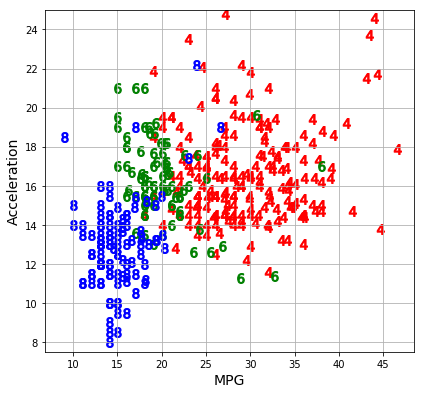

In [5]:
colors=["red", "green","blue"]
markers=["$4$","$6$","$8$"]
nclasses=3
for i in range(nclasses):
    x,y=zip(*X[Y==i])
    plt.scatter(x,y,marker=markers[i],color=colors[i],s=100)

plt.xlabel("MPG",fontsize=14)
plt.ylabel("Acceleration",fontsize=14)
plt.ylim([7.5,25])
plt.grid()
fig=plt.gcf()
fig.tight_layout()
fig.set_size_inches(6,6)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [7]:
XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y,test_size=.25)

In [8]:
LDA = LinearDiscriminantAnalysis()

In [9]:
LDA.fit(XTRAIN,YTRAIN)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [10]:
YP=LDA.predict(XTEST)

In [11]:
print(confusion_matrix(YTEST,YP))
print("accuracy = ",accuracy_score(YTEST,YP))

[[52  2  1]
 [ 4  9  3]
 [ 1  3 22]]
accuracy =  0.8556701030927835


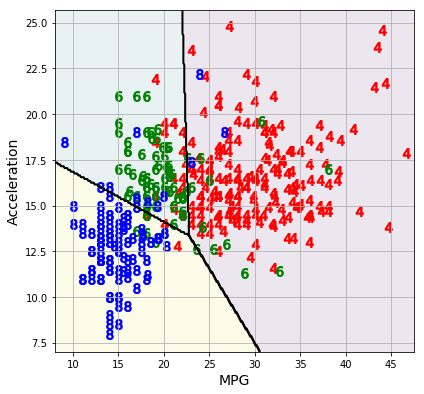

In [12]:
def visualize_classifier_contours(clf,X,Y,DX,DY,thelevels,colors,markers,xlab="X",
                                ylab="Y", filename='classifier-figure.pdf'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, DX),
                     np.arange(y_min, y_max, DY))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    c=plt.contour(xx, yy, Z, alpha=1,levels=thelevels,linewidths=2,colors="k")
    c=plt.contourf(xx, yy, Z, alpha=.1)
        
    nclasses=len(colors)
    for i in range(nclasses):
        x,y=zip(*X[Y==i])
        plt.scatter(x,y,marker=markers[i],color=colors[i],s=100)


    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    #plt.ylim([7.5,25])
    plt.grid()
    fig=plt.gcf()
    fig.tight_layout()
    fig.set_size_inches(6,6)
    fig.savefig(filename)
    
colors=["red", "green","blue"]
markers=["$4$","$6$","$8$"]

visualize_classifier_contours(LDA,X,Y,.1,.1, [0.5,1.5],colors,markers,"MPG","Acceleration",
                            filename="LDA-MPG-decision-boundaries.pdf")

In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [14]:
QDA=QuadraticDiscriminantAnalysis()

In [15]:
QDA.fit(XTRAIN,YTRAIN)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [16]:
YP=QDA.predict(XTEST)

In [17]:
print(confusion_matrix(YTEST,YP))
print("accuracy = ",accuracy_score(YTEST,YP))

[[51  4  0]
 [ 5  8  3]
 [ 1  1 24]]
accuracy =  0.8556701030927835


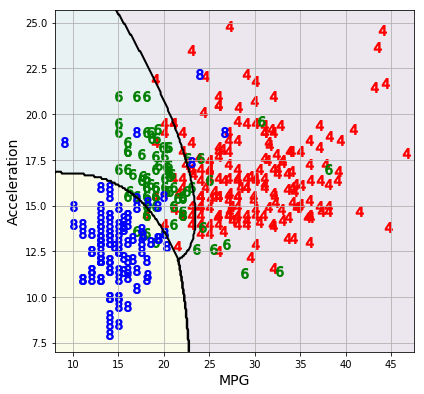

In [19]:
visualize_classifier_contours(QDA,X,Y,.1,.1, [0.5,1.5],colors,markers,"MPG","Acceleration",
                            filename="QDA-MPG-decision-boundaries.pdf")